# AA Insurance Assignment

In [1]:
#import library 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#importing DF
df =  pd.read_excel("C:\\Users\\akash\\Desktop\\AA-ins\\Case_Product.xlsx")

In [3]:
df.dtypes

Date                      datetime64[ns]
Segments                          object
Premium                            int64
Commission                         int64
PolicySold                         int64
UpsellProductSale                  int64
UpsellProductSalePrice             int64
dtype: object

In [4]:
df.describe()

,Premium,Commission,PolicySold,UpsellProductSale,UpsellProductSalePrice
count,108506.000000,108506.000000,108506.000000,108506.000000,108506.000000
mean,701.350451,46.534146,0.119219,0.076834,6.853547
std,635.067929,69.001621,0.324048,0.266330,24.675268
min,0.000000,-78.000000,0.000000,0.000000,0.000000
25%,302.000000,9.000000,0.000000,0.000000,0.000000
50%,447.000000,25.000000,0.000000,0.000000,0.000000
75%,839.000000,58.000000,0.000000,0.000000,0.000000
max,4425.000000,940.000000,1.000000,1.000000,222.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108506 entries, 0 to 108505
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    108506 non-null  datetime64[ns]
 1   Segments                108506 non-null  object        
 2   Premium                 108506 non-null  int64         
 3   Commission              108506 non-null  int64         
 4   PolicySold              108506 non-null  int64         
 5   UpsellProductSale       108506 non-null  int64         
 6   UpsellProductSalePrice  108506 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 5.8+ MB


# 1. Pre Processing

In [6]:
#find the num of null values
df.isnull().sum()

Date                      0
Segments                  0
Premium                   0
Commission                0
PolicySold                0
UpsellProductSale         0
UpsellProductSalePrice    0
dtype: int64

**1. Replacing the - values with the null to check the missing values**

In [7]:
# Find the number of zeros in the 'Premium' column
num_zeros = (df['Premium'] == 0).sum()
num_zeros

991

In [8]:
# Group by 'Premium' column where value is zero
grouped = df[df['Premium'] == 0]

In [9]:
#df.to_excel('output.xlsx', index=False)

In [10]:
# Count the number of rows where 'PolicySold' is 1
num_policy_sold = grouped['PolicySold'].sum()
num_policy_sold

232

In [11]:
# Group by 'polucy sold' column where value is zero
grouped = df[df['PolicySold'] == 1]

In [12]:
# Count the number of rows where 'PolicySold' is 1
num_policy_sold = grouped['PolicySold'].sum()
num_policy_sold

12936

In [13]:
232/12936

0.017934446505875078

**1.1 there is  991 missing values in the premium and in that group by only 232 are sold and it is 0.01% data so we can remove missing values**

In [14]:
df.shape

(108506, 7)

In [15]:
# Remove rows where 'Premium' column value is zero
df = df[df['Premium'] != 0]

In [16]:
df.shape

(107515, 7)

In [17]:
#copy data frame
df_copy = df.copy()

**2. check for duplicates**

In [18]:
# Check for duplicate rows in the entire dataset
duplicate_rows = df[df.duplicated()]

In [19]:
df_no_duplicates = df.drop_duplicates()

In [20]:
df.shape

(107515, 7)

In [21]:
df = df_no_duplicates.copy()
df.shape

(106343, 7)

Above duplicate rows are removed as they are not helpfull for the analysis and only 65 policies are sold so NP 

In [22]:
#duplicate_rows.to_excel('duplicate.xlsx', index=False)

**1.2 remove the years which are not usefull for the analysis and later drop the date column as it is not usefull for further analysis**

In [23]:
# Convert the "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
# Define years to remove
years_to_remove = [2020, 2022, 2023]

In [25]:
# Create a boolean mask for rows to keep
rows_to_keep = ~df['Date'].dt.year.isin(years_to_remove)

In [26]:
# Apply the boolean mask to filter the DataFrame
df_filtered = df[rows_to_keep]

In [27]:
df.shape

(106343, 7)

In [28]:
df_filtered.shape

(106335, 7)

**1.3 if the product is unsold and upsellproductsale is sold -- (my thinking is upsell is add ons to premium, I believe those are wrong representation)**

In [29]:
# Filter rows where PolicySold is 0 and UpsellProductSale is 1
rows_to_remove = df_filtered[(df['PolicySold'] == 0) & (df_filtered['UpsellProductSale'] == 1)].index

C:\Users\akash\AppData\Local\Temp/ipykernel_26048/2330422452.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_to_remove = df_filtered[(df['PolicySold'] == 0) & (df_filtered['UpsellProductSale'] == 1)].index


In [30]:
# Drop the selected rows
df_filtered_2 = df_filtered.drop(rows_to_remove)

In [31]:
# Reset index
df_filtered_2.reset_index(drop=True, inplace=True)

In [32]:
df = df_filtered_2.copy()

# 2 Feature engineering

**2.1 total revenue is only when the policy sold**

In [33]:
#total revenue is only when the policy sold


df["total_revenue"] = df["Commission"]+df['UpsellProductSalePrice']

In [34]:

# Multiply total revenue with PolicySold
df["TotalRevenueWithPolicySold"] = df["total_revenue"] * df["PolicySold"]

In [35]:
# Calculate Commission Percentage
df['Commission_Percentage'] = (df['Commission'] / df['Premium']) * 100

In [36]:
df.shape

(105380, 10)

In [37]:
# Group data by 'Segments' and calculate relevant statistics
segment_analysis = df.groupby('Segments').agg({
    'Premium': 'sum',
    'Commission': 'sum',
    'PolicySold': 'sum',
    'UpsellProductSalePrice': 'sum',
    'total_revenue': 'sum',
    'Commission_Percentage': 'mean'  
}).reset_index()

segment_analysis

,Segments,Premium,Commission,PolicySold,UpsellProductSalePrice,total_revenue,Commission_Percentage
0,P1,13670292,800160,38,3084,803244,5.872775
1,P10,3946024,243114,404,22824,265938,6.087179
2,P11,4079613,267030,506,30693,297723,6.429975
3,P12,3958421,269950,617,34548,304498,6.784027
4,P13,3696284,258997,740,41249,300246,6.905565
5,P14,3215667,234298,792,44724,279022,7.221221
6,P15,3065801,231990,966,52080,284070,7.471758
7,P16,2617154,210693,930,52314,263007,8.074385
8,P17,2474663,203681,1186,60845,264526,8.233152
9,P18,2258672,192911,1424,71254,264165,8.571307


In [38]:
#understand the stats

df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Premium,Commission,PolicySold,UpsellProductSale,UpsellProductSalePrice,total_revenue,TotalRevenueWithPolicySold,Commission_Percentage
count,105380.000000,105380.000000,105380.000000,105380.000000,105380.000000,105380.000000,105380.000000,105380.000000
mean,713.851803,47.160163,0.119937,0.068467,6.123230,53.283393,10.616360,7.153249
std,636.553603,69.532658,0.324890,0.252546,23.476752,72.905344,38.240432,7.095245
min,73.000000,-78.000000,0.000000,0.000000,0.000000,-78.000000,-46.000000,-2.614379
25%,307.000000,9.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.978691
50%,456.000000,26.000000,0.000000,0.000000,0.000000,29.000000,0.000000,5.593623
75%,857.000000,59.000000,0.000000,0.000000,0.000000,73.000000,0.000000,10.469019
90%,1605.000000,120.000000,1.000000,0.000000,0.000000,136.000000,14.000000,20.061728
95%,2155.000000,174.050000,1.000000,1.000000,72.000000,187.000000,95.000000,24.853801
99%,3096.210000,342.000000,1.000000,1.000000,120.000000,349.000000,181.000000,25.000000


# 3. Curation

In [39]:
#check the segment by premium outliers 

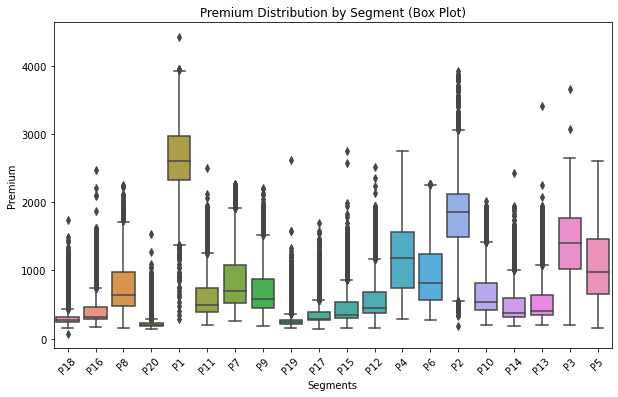

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Segments', y='Premium')
plt.title('Premium Distribution by Segment (Box Plot)')
plt.xticks(rotation=45)
plt.show()

In [41]:
dfcopy = df.copy()

In [42]:
# Calculate upper bound for outliers at the 90th percentile
upper_bound_percentile = 0.99
upper_bound = dfcopy.groupby('Segments')['Premium'].quantile(upper_bound_percentile)

In [43]:
# Filter out rows with premium values above the upper bound
df_filtered = dfcopy[dfcopy['Premium'] <= upper_bound[dfcopy['Segments']].values]

In [44]:
df.shape

(105380, 10)

In [45]:
df_filtered.shape

(104321, 10)

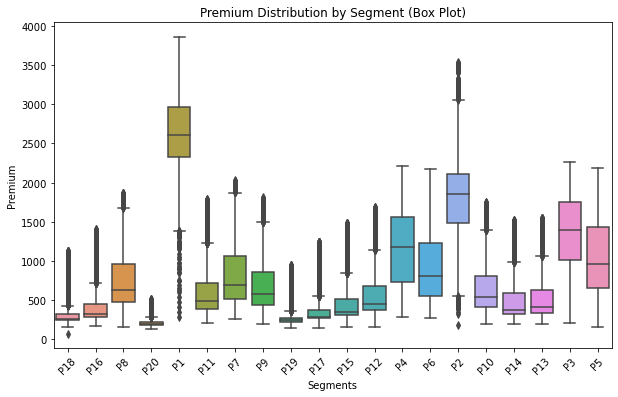

In [46]:
#handling categorical outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Segments', y='Premium')
plt.title('Premium Distribution by Segment (Box Plot)')
plt.xticks(rotation=45)
plt.show()

** removed the data with min amount of data loss**

In [47]:
#continious outliters

In [48]:
#commision has outliers Premium,commision,UpsellProductSalePrice, total_revenue, TotalRevenueWithPolicySold
#commision % is proper

In [49]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_filtered.describe(percentiles=[.25, .5, .75, .90, .95, .99])
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

,Premium,Commission,PolicySold,UpsellProductSale,UpsellProductSalePrice,total_revenue,TotalRevenueWithPolicySold,Commission_Percentage
count,104321.000000,104321.000000,104321.000000,104321.000000,104321.000000,104321.000000,104321.000000,104321.000000
mean,702.488310,46.428476,0.119832,0.068193,6.095206,52.523682,10.480306,7.155958
std,625.594725,68.680610,0.324767,0.252079,23.416440,72.047293,37.675534,7.112315
min,73.000000,-76.000000,0.000000,0.000000,0.000000,-76.000000,-46.000000,-2.614379
25%,306.000000,9.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.973684
50%,452.000000,25.000000,0.000000,0.000000,0.000000,29.000000,0.000000,5.580694
75%,837.000000,58.000000,0.000000,0.000000,0.000000,72.000000,0.000000,10.443864
90%,1558.000000,117.000000,1.000000,0.000000,0.000000,133.000000,13.000000,20.108696
95%,2129.000000,171.000000,1.000000,1.000000,72.000000,184.000000,95.000000,24.855491
99%,3070.000000,338.000000,1.000000,1.000000,120.000000,345.000000,178.000000,25.000000


In [50]:
list_features = ['Premium', 'Commission', 'PolicySold',
       'UpsellProductSale', 'UpsellProductSalePrice', "TotalRevenueWithPolicySold"]

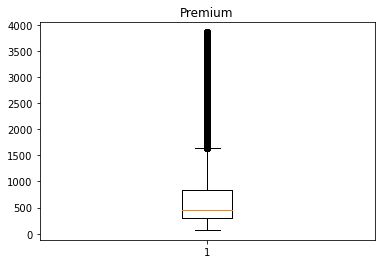

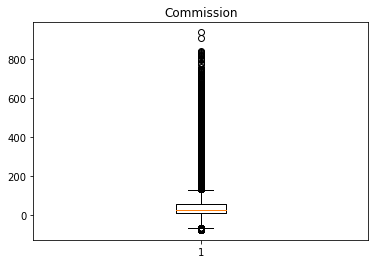

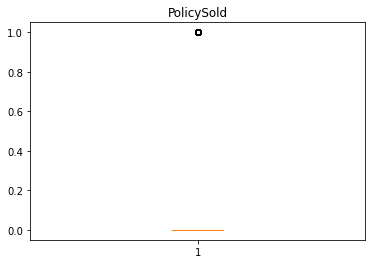

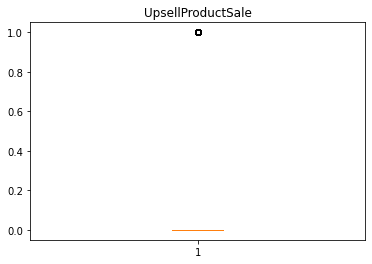

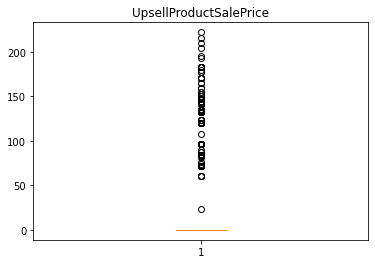

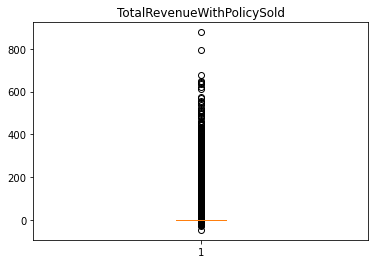

In [51]:
#more skewness and outliers found in the dataset
#Box plot to check skewness and outliers
#all at once
for feature in list_features:
    plt.boxplot(df_filtered[feature])
    plt.title(feature)
    plt.show()

In [52]:
columns_to_check = ['Premium', 'Commission', 'UpsellProductSalePrice', 'total_revenue', 'TotalRevenueWithPolicySold']

In [53]:
# Calculate the 99th percentile for each column
percentile_99 = df_filtered[columns_to_check].quantile(0.99)

In [54]:
# Create boolean masks for each column indicating rows with values above the 99th percentile
outlier_masks = df_filtered[columns_to_check] > percentile_99

In [55]:
# Use the masks to filter out rows with outliers
df_filtered_2 = df_filtered[~outlier_masks.any(axis=1)]

In [56]:
df_filtered.shape

(104321, 10)

In [57]:
df_filtered_2.shape

(100939, 10)

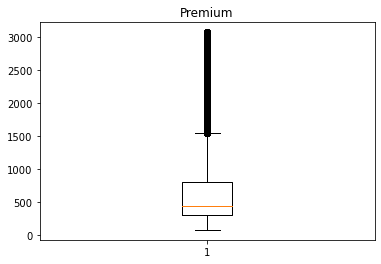

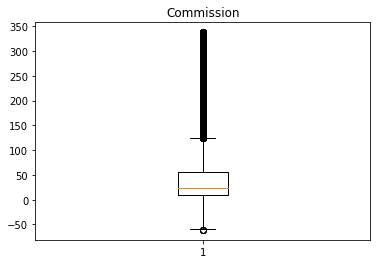

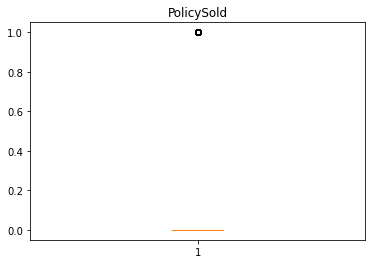

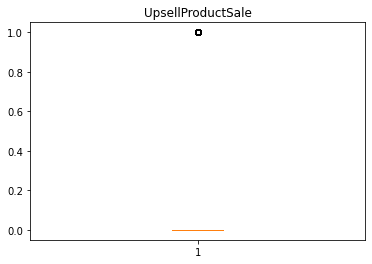

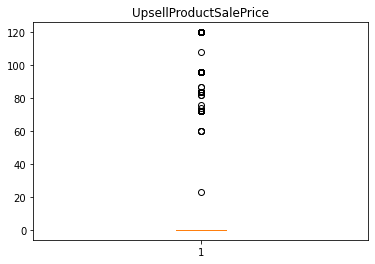

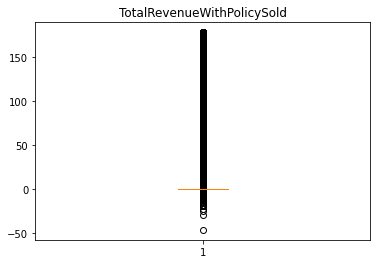

In [58]:
#more skewness and outliers found in the dataset
#Box plot to check skewness and outliers
#all at once
for feature in list_features:
    plt.boxplot(df_filtered_2[feature])
    plt.title(feature)
    plt.show()

In [59]:
df_filtered_2=df_filtered_2[~(df_filtered_2["TotalRevenueWithPolicySold"]<-45)]

In [60]:
df_filtered_2.shape

(100938, 10)

In [61]:
df_filtered_2.shape

(100938, 10)

In [62]:
df2 = df_filtered_2.copy()

In [63]:
# Assuming df2 is your DataFrame with outliers removed and index reset
df3 = df2.reset_index(drop=True)

# Display the corrected DataFrame
df3


,Date,Segments,Premium,Commission,PolicySold,UpsellProductSale,UpsellProductSalePrice,total_revenue,TotalRevenueWithPolicySold,Commission_Percentage
0,2021-06-25,P18,231,1,0,0,0,1,0,0.432900
1,2021-07-13,P16,643,13,0,0,0,13,0,2.021773
2,2021-10-28,P16,837,4,0,0,0,4,0,0.477897
3,2021-07-16,P8,658,-7,0,0,0,-7,0,-1.063830
4,2021-09-28,P20,153,38,0,0,0,38,0,24.836601
...,...,...,...,...,...,...,...,...,...,...
100933,2021-08-06,P15,266,66,0,0,0,66,0,24.812030
100934,2021-08-13,P4,1947,128,0,0,0,128,0,6.574217
100935,2021-07-30,P17,238,13,0,0,0,13,0,5.462185
100936,2021-05-16,P12,950,92,0,0,0,92,0,9.684211


In [64]:
#df3.to_excel('cleaned.xlsx', index=False)

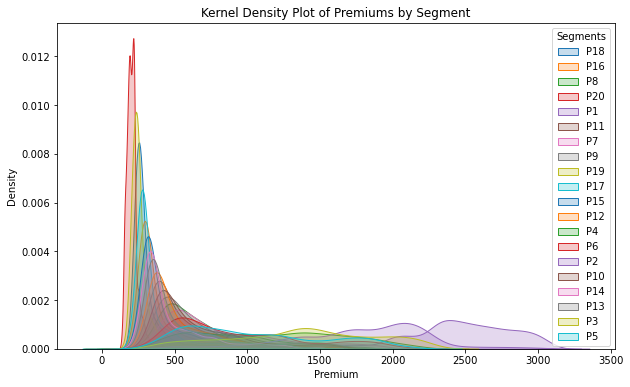

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with the data
# Replace 'Premium' with the actual column name containing premium amounts

# Create kernel density plots for each segment
plt.figure(figsize=(10, 6))
segments = df3['Segments'].unique()
for segment in segments:
    sns.kdeplot(data=df3[df3['Segments'] == segment], x='Premium', label=segment, fill=True)

plt.title('Kernel Density Plot of Premiums by Segment')
plt.xlabel('Premium')
plt.ylabel('Density')
plt.legend(title='Segments')
plt.show()


In [66]:
########################################################

# 4. Now that processing is done next step is Segment analysis

In [67]:
df3.columns

Index(['Date', 'Segments', 'Premium', 'Commission', 'PolicySold',
       'UpsellProductSale', 'UpsellProductSalePrice', 'total_revenue',
       'TotalRevenueWithPolicySold', 'Commission_Percentage'],
      dtype='object')

drop the columns that are not impt for further analysis

In [68]:
# Group data by 'Segments' and calculate relevant statistics
segment_analysis = df3.groupby('Segments').agg({
    'Premium': 'sum',
    'Commission': 'sum',
    'PolicySold': 'sum',
    'UpsellProductSalePrice': 'sum',
    'total_revenue': 'sum',
    'TotalRevenueWithPolicySold': 'sum',
    'Commission_Percentage': 'mean'  
}).reset_index()

segment_analysis

,Segments,Premium,Commission,PolicySold,UpsellProductSalePrice,total_revenue,TotalRevenueWithPolicySold,Commission_Percentage
0,P1,8737338,356350,12,672,357022,961,4.163136
1,P10,3746602,220246,303,12180,232426,21739,5.886530
2,P11,3861236,246017,394,18972,264989,31691,6.284816
3,P12,3759803,251200,518,24348,275548,41478,6.685370
4,P13,3495137,238833,614,27734,266567,47708,6.771871
5,P14,3017995,213557,648,28296,241853,50015,7.056149
6,P15,2883114,212762,840,38199,250961,65121,7.328533
7,P16,2453336,193995,804,37826,231821,61462,7.961905
8,P17,2319661,188263,1041,43716,231979,72147,8.136074
9,P18,2110620,176995,1281,54876,231871,87788,8.468683


# Point to note in segemnt analysis
    # 1. premium is based on thbe risk p1 is highest risk and it has high premium and p20 is lowest
    # 2. high commision segemnts are P1, P2, p12, p11,p9 low commisionsegment are p4,p5,p3,p19 and p20
    # 3. but P20 to p10 are highest policy sold, lowest are p1 to p5
    # 4. same with the UpsellProductSalePrice
    # 5. total revenue will be ignored
    # 6. TotalRevenueWithPolicySold P20 to p10 are highest policy sold, lowest are p1 to p5
    # 7. Commission_Percentage same
# main point here is check the UpsellProductSalePrice, TotalRevenueWithPolicySold and Commission_Percentage order to optimise the price by threshold 


# plots

In [69]:
#segment_analysis.to_excel("segementanalysis.xlsx", index=False)

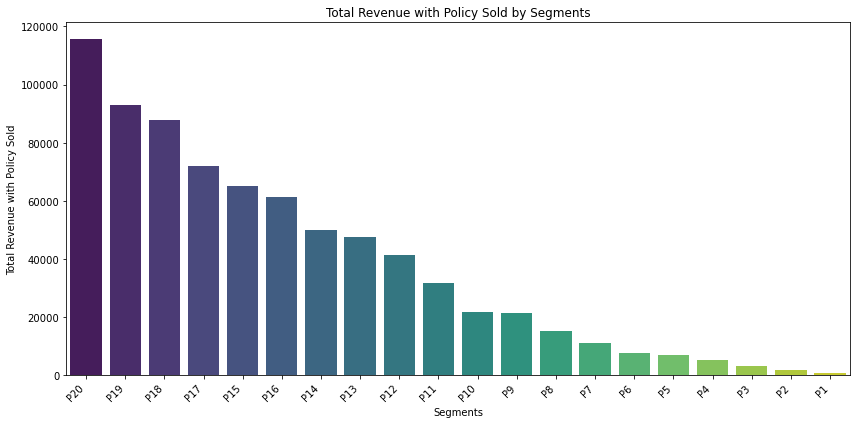

In [70]:
# Sort the dataframe by a column (e.g., TotalRevenueWithPolicySold) in descending order
df_sorted = segment_analysis.sort_values(by='TotalRevenueWithPolicySold', ascending=False)

# Set up the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Segments', y='TotalRevenueWithPolicySold', data=df_sorted, palette='viridis')

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Total Revenue with Policy Sold by Segments')
ax.set_xlabel('Segments')
ax.set_ylabel('Total Revenue with Policy Sold')

# Display the plot
plt.tight_layout()
plt.show()

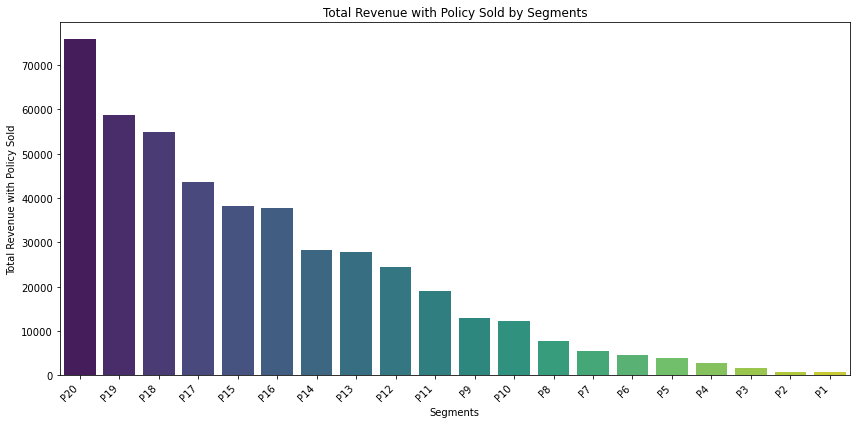

In [71]:
# Sort the dataframe by a column (e.g., TotalRevenueWithPolicySold) in descending order
df_sorted = segment_analysis.sort_values(by='UpsellProductSalePrice', ascending=False)

# Set up the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Segments', y='UpsellProductSalePrice', data=df_sorted, palette='viridis')

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Total Revenue with Policy Sold by Segments')
ax.set_xlabel('Segments')
ax.set_ylabel('Total Revenue with Policy Sold')

# Display the plot
plt.tight_layout()
plt.show()

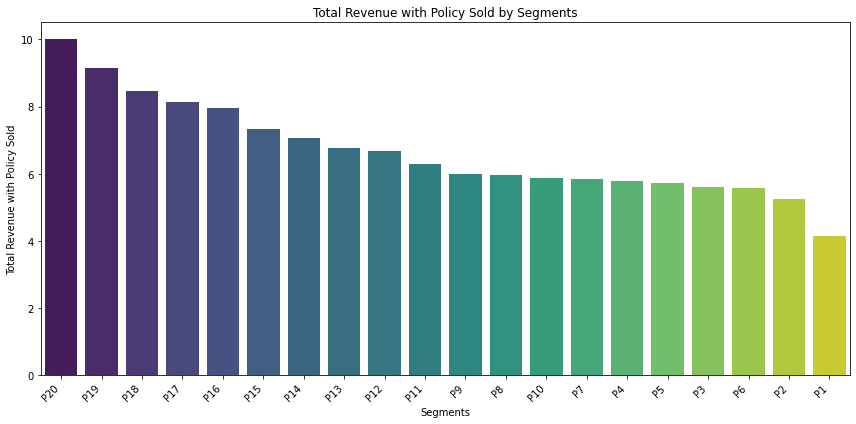

In [72]:
# Sort the dataframe by a column (e.g., TotalRevenueWithPolicySold) in descending order
df_sorted = segment_analysis.sort_values(by='Commission_Percentage', ascending=False)

# Set up the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Segments', y='Commission_Percentage', data=df_sorted, palette='viridis')

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Total Revenue with Policy Sold by Segments')
ax.set_xlabel('Segments')
ax.set_ylabel('Total Revenue with Policy Sold')

# Display the plot
plt.tight_layout()
plt.show()

In [73]:
df3.columns

Index(['Date', 'Segments', 'Premium', 'Commission', 'PolicySold',
       'UpsellProductSale', 'UpsellProductSalePrice', 'total_revenue',
       'TotalRevenueWithPolicySold', 'Commission_Percentage'],
      dtype='object')

**for further analysis date as we have only one year, no point keeping const variable, Date, total_revenue**

In [74]:
df3.drop(columns =["Date", 'total_revenue'], inplace = True)

In [75]:
#segment_analysis_2.to_excel("segment2.xlsx", index = False)

In [76]:
df3.columns

Index(['Segments', 'Premium', 'Commission', 'PolicySold', 'UpsellProductSale',
       'UpsellProductSalePrice', 'TotalRevenueWithPolicySold',
       'Commission_Percentage'],
      dtype='object')

# To find the correlation between the segemnts and the target variable TotalRevenueWithPolicySold we only keep the policy sold as it is the only way company can make profit

In [77]:
df_policy_sold = df3[df3["PolicySold"] == 1]

**get clear picture of segment analysis**

In [78]:
# Group data by 'Segments' and calculate relevant statistics
segment_analysis_2 = df_policy_sold.groupby('Segments').agg({
    'Premium': 'sum',
    'Commission': 'sum',
    'PolicySold': 'sum',
    'UpsellProductSalePrice': 'sum',
    'TotalRevenueWithPolicySold': 'sum',
    'Commission_Percentage': 'mean'  
}).reset_index()

segment_analysis_2

,Segments,Premium,Commission,PolicySold,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage
0,P1,17103,289,12,672,961,2.674547
1,P10,172668,9559,303,12180,21739,6.260827
2,P11,216965,12719,394,18972,31691,6.423913
3,P12,253461,17130,518,24348,41478,7.147533
4,P13,291885,19974,614,27734,47708,7.280771
5,P14,291494,21719,648,28296,50015,7.772028
6,P15,354940,26922,840,38199,65121,7.775046
7,P16,315668,23636,804,37826,61462,8.055258
8,P17,362004,28431,1041,43716,72147,8.034133
9,P18,401158,32912,1281,54876,87788,8.473536


In [79]:
#sum of over all revenue only p sold
sum_of_over_all_revenue = df_policy_sold["TotalRevenueWithPolicySold"].sum()
sum_of_over_all_revenue

761654

In [80]:
df_policy_sold.drop(columns =["PolicySold"], inplace = True)

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
df_policy_sold.shape

(10948, 7)

# 5. Stastical analysis

In [82]:
df3 = df_policy_sold.copy()

In [83]:
#feature selection

In [84]:
unique_count = df3['Segments'].nunique()
unique_count

20

In [85]:
df3[['Segments']].astype('category').describe()

,Segments
count,10948
unique,20
top,P20
freq,2119


In [86]:

df3['Segments'].value_counts().sort_values(ascending=False)

P20    2119
P19    1455
P18    1281
P17    1041
P15     840
P16     804
P14     648
P13     614
P12     518
P11     394
P10     303
P9      281
P8      201
P7      130
P5       91
P6       91
P4       61
P3       43
P2       21
P1       12
Name: Segments, dtype: int64

# as segemnt is imbalanced oversample should be done

In [87]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [88]:
# input split
X = df3.drop(columns=['Segments'], axis=1)
y = df3['Segments']

In [89]:
# Assuming X is your feature matrix and y is your target labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [90]:
# Check the class distribution after resampling
print(Counter(y_resampled))

Counter({'P11': 2119, 'P9': 2119, 'P7': 2119, 'P8': 2119, 'P17': 2119, 'P12': 2119, 'P18': 2119, 'P13': 2119, 'P20': 2119, 'P14': 2119, 'P15': 2119, 'P19': 2119, 'P4': 2119, 'P10': 2119, 'P16': 2119, 'P5': 2119, 'P6': 2119, 'P1': 2119, 'P2': 2119, 'P3': 2119})


In [91]:
# Convert arrays to DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

In [92]:
y_resampled_df = pd.DataFrame({'Segments': y_resampled})
y_resampled_df

,Segments
0,P11
1,P9
2,P7
3,P8
4,P17
...,...
42375,P9
42376,P9
42377,P9
42378,P9


In [93]:
# Reset index of X_resampled_df
X_resampled_df.reset_index(drop=True, inplace=True)

In [94]:
# Reset index of y_resampled_df and drop its index column
y_resampled_df.reset_index(drop=True, inplace=True)

In [95]:
# Concatenate the DataFrames horizontally
combined_resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [96]:
combined_resampled_df

,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Segments
0,712,178,0,0,178,25.000000,P11
1,513,0,0,0,0,0.000000,P9
2,628,11,0,0,11,1.751592,P7
3,1129,-21,1,84,63,-1.860053,P8
4,806,19,1,84,103,2.357320,P17
...,...,...,...,...,...,...,...
42375,473,8,0,0,8,1.729668,P9
42376,657,84,0,0,84,12.782964,P9
42377,345,83,1,84,167,24.171083,P9
42378,769,37,0,0,37,4.818916,P9


In [97]:
#create dummy variables

In [98]:
df_encoded = pd.get_dummies(combined_resampled_df, columns=['Segments'], prefix=['Segment'])

In [99]:
df_encoded

,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Segment_P1,Segment_P10,Segment_P11,Segment_P12,...,Segment_P19,Segment_P2,Segment_P20,Segment_P3,Segment_P4,Segment_P5,Segment_P6,Segment_P7,Segment_P8,Segment_P9
0,712,178,0,0,178,25.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,513,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,628,11,0,0,11,1.751592,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1129,-21,1,84,63,-1.860053,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,806,19,1,84,103,2.357320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42375,473,8,0,0,8,1.729668,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42376,657,84,0,0,84,12.782964,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42377,345,83,1,84,167,24.171083,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42378,769,37,0,0,37,4.818916,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
df_combined = df_encoded.copy()

In [101]:
df_combined.shape

(42380, 26)

In [102]:
df_combined.columns

Index(['Premium', 'Commission', 'UpsellProductSale', 'UpsellProductSalePrice',
       'TotalRevenueWithPolicySold', 'Commission_Percentage', 'Segment_P1',
       'Segment_P10', 'Segment_P11', 'Segment_P12', 'Segment_P13',
       'Segment_P14', 'Segment_P15', 'Segment_P16', 'Segment_P17',
       'Segment_P18', 'Segment_P19', 'Segment_P2', 'Segment_P20', 'Segment_P3',
       'Segment_P4', 'Segment_P5', 'Segment_P6', 'Segment_P7', 'Segment_P8',
       'Segment_P9'],
      dtype='object')

# 1

In [103]:
X = df_combined.drop("TotalRevenueWithPolicySold",axis=1)   #Feature Matrix
y = df_combined["TotalRevenueWithPolicySold"] 

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42380 entries, 0 to 42379
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Premium                 42380 non-null  int64  
 1   Commission              42380 non-null  int64  
 2   UpsellProductSale       42380 non-null  int64  
 3   UpsellProductSalePrice  42380 non-null  int64  
 4   Commission_Percentage   42380 non-null  float64
 5   Segment_P1              42380 non-null  uint8  
 6   Segment_P10             42380 non-null  uint8  
 7   Segment_P11             42380 non-null  uint8  
 8   Segment_P12             42380 non-null  uint8  
 9   Segment_P13             42380 non-null  uint8  
 10  Segment_P14             42380 non-null  uint8  
 11  Segment_P15             42380 non-null  uint8  
 12  Segment_P16             42380 non-null  uint8  
 13  Segment_P17             42380 non-null  uint8  
 14  Segment_P18             42380 non-null

In [105]:
#normalization

In [106]:
num_columns = ['Premium', 'Commission', 'UpsellProductSalePrice',"Commission_Percentage"]

In [107]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected column
X[num_columns] = scaler.fit_transform(X[num_columns])


# find the multi correlation with independent variables

In [108]:
X.corr()

,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,Commission_Percentage,Segment_P1,Segment_P10,Segment_P11,Segment_P12,Segment_P13,...,Segment_P19,Segment_P2,Segment_P20,Segment_P3,Segment_P4,Segment_P5,Segment_P6,Segment_P7,Segment_P8,Segment_P9
Premium,1.000000,0.161758,0.070997,0.085870,-0.254170,0.400483,-0.028054,-0.033387,-0.059191,-0.072555,...,-0.175947,0.245972,-0.208418,0.198104,0.101084,0.134013,0.058838,0.031601,-0.001239,-0.008926
Commission,0.161758,1.000000,-0.189011,-0.190531,0.759587,-0.054819,-0.004850,-0.001200,0.010931,-0.004428,...,-0.059864,0.120993,-0.090331,0.030264,0.051792,0.007909,0.001247,0.068017,0.037452,-0.030462
UpsellProductSale,0.070997,-0.189011,1.000000,0.905530,-0.170805,0.042711,-0.018784,0.031668,0.029503,0.029719,...,-0.006225,-0.109728,-0.031776,-0.038922,0.004601,-0.020083,0.028636,-0.015536,-0.016402,0.022573
UpsellProductSalePrice,0.085870,-0.190531,0.905530,1.000000,-0.176878,0.064242,-0.028613,0.024652,0.016908,0.018268,...,-0.017024,-0.058519,-0.042917,-0.008938,0.015274,-0.003728,0.044688,-0.013779,-0.033247,0.019950
Commission_Percentage,-0.254170,0.759587,-0.170805,-0.176878,1.000000,-0.125395,-0.009383,-0.004834,0.019445,0.017405,...,0.075909,-0.033111,0.085127,-0.082746,-0.020033,-0.064717,-0.043948,-0.007735,0.006102,-0.048618
Segment_P1,0.400483,-0.054819,0.042711,0.064242,-0.125395,1.000000,-0.052632,-0.052632,-0.052632,-0.052632,...,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632
Segment_P10,-0.028054,-0.004850,-0.018784,-0.028613,-0.009383,-0.052632,1.000000,-0.052632,-0.052632,-0.052632,...,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632
Segment_P11,-0.033387,-0.001200,0.031668,0.024652,-0.004834,-0.052632,-0.052632,1.000000,-0.052632,-0.052632,...,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632
Segment_P12,-0.059191,0.010931,0.029503,0.016908,0.019445,-0.052632,-0.052632,-0.052632,1.000000,-0.052632,...,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632
Segment_P13,-0.072555,-0.004428,0.029719,0.018268,0.017405,-0.052632,-0.052632,-0.052632,-0.052632,1.000000,...,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632,-0.052632


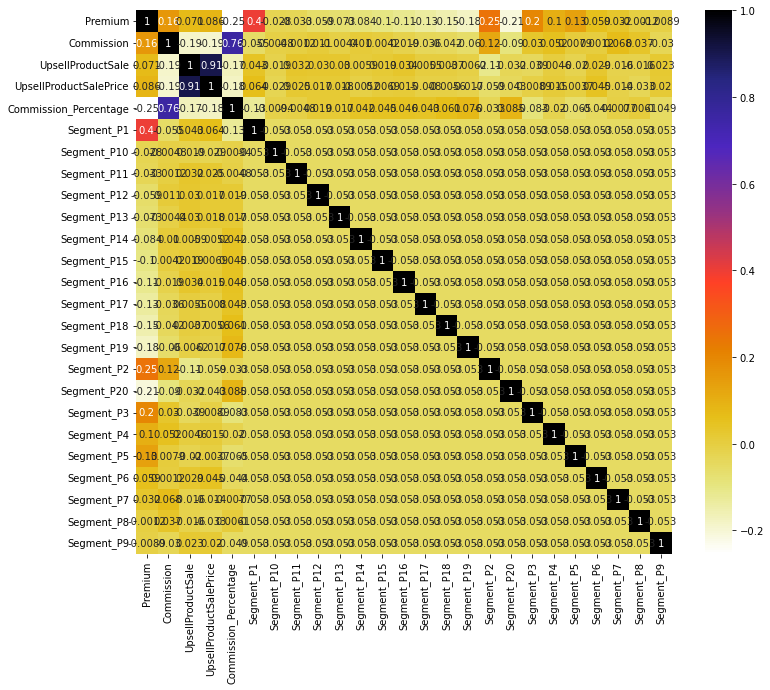

In [109]:
from matplotlib import pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [110]:
list_Indpndt_features = [feature for feature in df_combined.columns if 'TotalRevenueWithPolicySold' not in feature ]

In [111]:
list_Indpndt_features

['Premium',
 'Commission',
 'UpsellProductSale',
 'UpsellProductSalePrice',
 'Commission_Percentage',
 'Segment_P1',
 'Segment_P10',
 'Segment_P11',
 'Segment_P12',
 'Segment_P13',
 'Segment_P14',
 'Segment_P15',
 'Segment_P16',
 'Segment_P17',
 'Segment_P18',
 'Segment_P19',
 'Segment_P2',
 'Segment_P20',
 'Segment_P3',
 'Segment_P4',
 'Segment_P5',
 'Segment_P6',
 'Segment_P7',
 'Segment_P8',
 'Segment_P9']

In [112]:
#Assumptions of Dependent and Independent Features
#Null Hypothesis 1 : - The Independent features are Highly corelated with each othe
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = X[list_Indpndt_features[i]].corr(X[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

Commission  &  Commission_Percentage  =  0.7595870387992335
UpsellProductSale  &  UpsellProductSalePrice  =  0.9055304351066232


In [113]:
#Assumptions of Dependent and Independent Features
#Null Hypothesis 1 : - The Independent features are Highly corelated with each othe
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = X[list_Indpndt_features[i]].corr(X[list_Indpndt_features[j]])
        if (correlation<=-0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

In [114]:
#drop highly correlated column
df_drop = X.drop(columns=['UpsellProductSale'])

In [115]:
df_drop.columns

Index(['Premium', 'Commission', 'UpsellProductSalePrice',
       'Commission_Percentage', 'Segment_P1', 'Segment_P10', 'Segment_P11',
       'Segment_P12', 'Segment_P13', 'Segment_P14', 'Segment_P15',
       'Segment_P16', 'Segment_P17', 'Segment_P18', 'Segment_P19',
       'Segment_P2', 'Segment_P20', 'Segment_P3', 'Segment_P4', 'Segment_P5',
       'Segment_P6', 'Segment_P7', 'Segment_P8', 'Segment_P9'],
      dtype='object')

In [116]:
list_Indpndt_features = [feature for feature in df_drop.columns if 'TotalRevenueWithPolicySold' not in feature ]

In [117]:
#check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =df_drop[list_Indpndt_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_drop[list_Indpndt_features].values, i)
                          for i in range(len(df_drop[list_Indpndt_features].columns))]
  
print(vif_data)

                   feature       VIF
0                  Premium  2.279623
1               Commission  3.976425
2   UpsellProductSalePrice  1.067889
3    Commission_Percentage  3.987731
4               Segment_P1  1.294732
5              Segment_P10  1.002769
6              Segment_P11  1.003680
7              Segment_P12  1.007481
8              Segment_P13  1.009659
9              Segment_P14  1.012614
10             Segment_P15  1.017613
11             Segment_P16  1.023824
12             Segment_P17  1.032708
13             Segment_P18  1.045580
14             Segment_P19  1.068524
15              Segment_P2  1.120557
16             Segment_P20  1.106423
17              Segment_P3  1.071971
18              Segment_P4  1.021405
19              Segment_P5  1.032819
20              Segment_P6  1.009543
21              Segment_P7  1.016767
22              Segment_P8  1.004577
23              Segment_P9  1.003792


#Variance Inflation Factor (VIF) is used to identify multicollinearity among predictor variables in regression analysis. Multicollinearity can distort coefficient estimates, affect model interpretation, and impact model stability. High VIF values suggest strong correlations between variables, prompting analysts to address multicollinearity to improve model 

In [118]:
df_drop.columns

Index(['Premium', 'Commission', 'UpsellProductSalePrice',
       'Commission_Percentage', 'Segment_P1', 'Segment_P10', 'Segment_P11',
       'Segment_P12', 'Segment_P13', 'Segment_P14', 'Segment_P15',
       'Segment_P16', 'Segment_P17', 'Segment_P18', 'Segment_P19',
       'Segment_P2', 'Segment_P20', 'Segment_P3', 'Segment_P4', 'Segment_P5',
       'Segment_P6', 'Segment_P7', 'Segment_P8', 'Segment_P9'],
      dtype='object')

In [119]:
num_columns = ['Premium', 'Commission', 'UpsellProductSalePrice',"Commission_Percentage","TotalRevenueWithPolicySold"]

In [120]:
#there is a presence of skewness, data needs transformation
from scipy import stats
from pylab import *
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

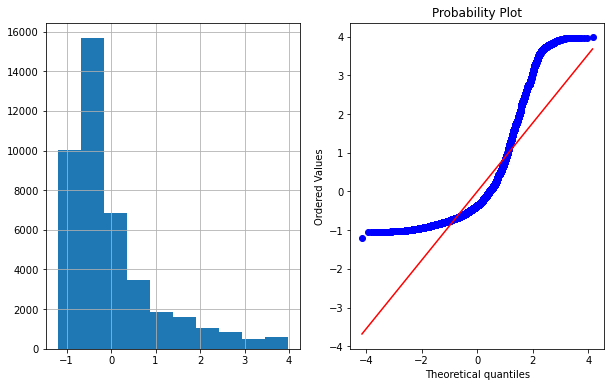

In [121]:
plot_data(df_drop,'Premium')

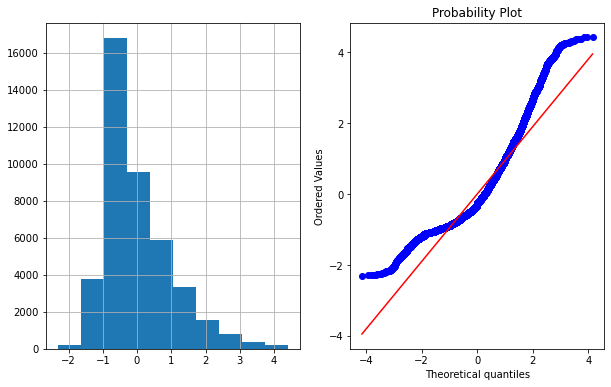

In [122]:
plot_data(df_drop,'Commission')

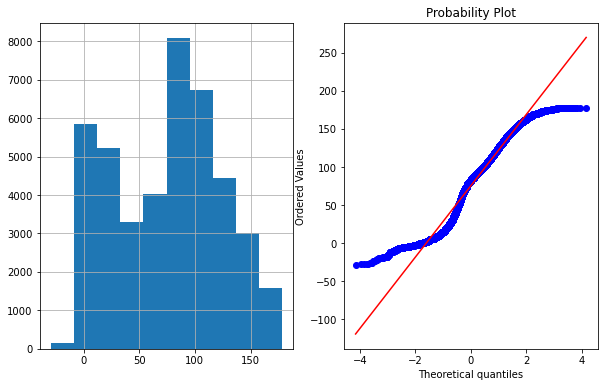

In [123]:
plot_data(df_combined,'TotalRevenueWithPolicySold')

# Find the top features that affect the revenue

In [124]:
df_drop.columns

Index(['Premium', 'Commission', 'UpsellProductSalePrice',
       'Commission_Percentage', 'Segment_P1', 'Segment_P10', 'Segment_P11',
       'Segment_P12', 'Segment_P13', 'Segment_P14', 'Segment_P15',
       'Segment_P16', 'Segment_P17', 'Segment_P18', 'Segment_P19',
       'Segment_P2', 'Segment_P20', 'Segment_P3', 'Segment_P4', 'Segment_P5',
       'Segment_P6', 'Segment_P7', 'Segment_P8', 'Segment_P9'],
      dtype='object')

In [125]:
#loading top best predictors for the modeling

x_data = df_drop[['Premium', 'Commission', 'UpsellProductSalePrice',
       'Commission_Percentage', 'Segment_P1', 'Segment_P10', 'Segment_P11',
       'Segment_P12', 'Segment_P13', 'Segment_P14', 'Segment_P15',
       'Segment_P16', 'Segment_P17', 'Segment_P18', 'Segment_P19',
       'Segment_P2', 'Segment_P20', 'Segment_P3', 'Segment_P4', 'Segment_P5',
       'Segment_P6', 'Segment_P7', 'Segment_P8', 'Segment_P9']]
y_data = df_combined['TotalRevenueWithPolicySold']
print("y_data",y_data)

y_data 0        178
1          0
2         11
3         63
4        103
        ... 
42375      8
42376     84
42377    167
42378     37
42379     28
Name: TotalRevenueWithPolicySold, Length: 42380, dtype: int64


In [126]:
# Concatenate the DataFrames along columns (axis=1)
combined_data = pd.concat([x_data, y_data], axis=1)

# Pearson correlation

In [127]:
# Calculate Pearson correlation coefficients
correlation_matrix = combined_data.corr()

In [128]:
# Get correlations with respect to the target variable "TotalRevenueWithPolicySold"
revenue_correlations = correlation_matrix["TotalRevenueWithPolicySold"].sort_values(ascending=False)

In [129]:
# Print or analyze the correlation values
print(revenue_correlations)

TotalRevenueWithPolicySold    1.000000
UpsellProductSalePrice        0.730344
Commission                    0.531372
Commission_Percentage         0.375303
Premium                       0.187065
Segment_P4                    0.049632
Segment_P6                    0.039641
Segment_P7                    0.035483
Segment_P2                    0.034354
Segment_P12                   0.022072
Segment_P11                   0.020427
Segment_P1                    0.017343
Segment_P3                    0.013895
Segment_P13                   0.012464
Segment_P15                   0.008590
Segment_P14                   0.002579
Segment_P5                    0.002561
Segment_P16                  -0.000807
Segment_P8                   -0.002642
Segment_P9                   -0.004062
Segment_P10                  -0.028136
Segment_P17                  -0.032241
Segment_P18                  -0.034491
Segment_P19                  -0.056599
Segment_P20                  -0.100061
Name: TotalRevenueWithPol

I chose SelectKBest with mutual information because it's a powerful technique that measures the dependency between features and the target variable, helping us identify the most informative features for prediction. On the other hand, I selected Random Forest Feature Importance because it provides insights into how much each feature contributes to the model's predictive performance, which helps us identify influential features in a complex model like Random Forest.

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

In [131]:
# SelectKBest with mutual information
k = 15  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
x_kbest = selector.fit_transform(x_data, y_data)

In [132]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

In [133]:
# Random Forest Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_data, y_data)

RandomForestRegressor(random_state=42)

In [134]:

# Get feature importance scores
feature_importances = rf_model.feature_importances_

In [135]:

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

In [136]:
print("\nTop k important features using Random Forest Feature Importance:")
for i in range(k):
    print(f"Feature: {x_data.columns[sorted_indices[i]]}, Importance: {feature_importances[sorted_indices[i]]}")


Top k important features using Random Forest Feature Importance:
Feature: UpsellProductSalePrice, Importance: 0.5562095021561327
Feature: Commission, Importance: 0.4416252727366931
Feature: Commission_Percentage, Importance: 0.002056877139924562
Feature: Premium, Importance: 6.313075722935802e-05
Feature: Segment_P2, Importance: 9.118025346392928e-06
Feature: Segment_P3, Importance: 6.656164766272082e-06
Feature: Segment_P6, Importance: 4.867644542877371e-06
Feature: Segment_P4, Importance: 3.791464050296527e-06
Feature: Segment_P5, Importance: 3.527417909315215e-06
Feature: Segment_P7, Importance: 3.4064944545482636e-06
Feature: Segment_P1, Importance: 3.0617037852710657e-06
Feature: Segment_P11, Importance: 1.8183803663752034e-06
Feature: Segment_P8, Importance: 1.657202149756051e-06
Feature: Segment_P9, Importance: 1.5639899129080598e-06
Feature: Segment_P12, Importance: 1.3172918430504485e-06


In [137]:
#check segment average before assigning the treshold 

# segment analysis wont give us good results as it is not balacned in the above randomforest closly corelates the cluster analysis that is been done in tableau we can consider the above for the optimisation, but here one thing missed is the upselling market correlation, further it will be worked on
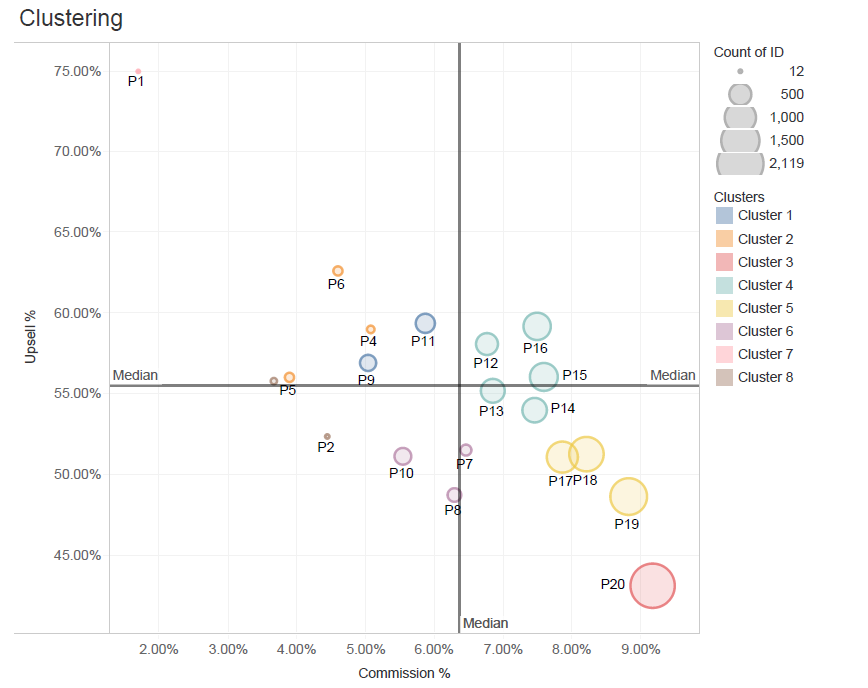

1.Cluster 7  P1   p6, p4, p5(cluster2) there is a potential opportunity to increase the revenue, also in their our commission is very less (possible alteration is decrease the premium(asking 3rd party) and increase our commission % result in higher profit
	2. Cluster 8 p3 as well (more threshold than 9 and 11)
	2. Cluster 1 (p9 and p11) is the potential seller and we can increase commission to highest threshold  and up sell product ( as up sell ad ons are the high revenue generator for the company)  
	3. Cluster 6 P10, p8 and p7 same as above
	4. Cluster 4 p12,p13,p16,p14,p15 same as above threshold descending order 
	5. 
	6. Cluster 5 p17,18,19 increase In decreasing order
7. Cluster 3 P20 is high in commission in terms of only premium, we need to focus on upselling more as there is an opportunity

# As we are making good profit in the UpsellProductSalePrice as all money generates as revenue, we need to optimise the variables closly to increase the revenue 

# 2

Cluster 7 : P1, p6, p4, p5
Cluster 8 : p3 
Cluster 1 : p9, p11
Cluster 6 : P10, p8,  p7
Cluster 4 : p12,p13,p16,p14,p15
Cluster 5 : p17,18,19   
Cluster 3 : P20

In [235]:
df4 = df3.copy()

In [236]:
# Create a dictionary mapping segments to cluster numbers
segment_to_cluster = {
    'P1': 1, 'P6': 1, 'P4': 1, 'P5': 1,
    'P3': 2, 'P2' : 2,
    'P9': 3, 'P11': 3,
    'P10': 4, 'P8': 4, 'P7': 4,
    'P12': 5, 'P13': 5, 'P16': 5, 'P14': 5, 'P15': 5,
    'P17': 6, 'P18': 6, 'P19': 6,
    'P20': 7
}

In [237]:
# Add a new column "Cluster" based on the mapping
df4['Cluster'] = df4['Segments'].map(segment_to_cluster)

In [238]:
df4

,Segments,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Cluster
7,P11,712,178,0,0,178,25.000000,3
9,P9,513,0,0,0,0,0.000000,3
21,P7,628,11,0,0,11,1.751592,4
29,P8,1129,-21,1,84,63,-1.860053,4
36,P17,806,19,1,84,103,2.357320,6
...,...,...,...,...,...,...,...,...
100894,P14,1520,105,0,0,105,6.907895,5
100901,P20,218,54,0,0,54,24.770642,7
100905,P20,162,11,0,0,11,6.790123,7
100917,P17,319,7,1,84,91,2.194357,6


In [239]:
# Step 1: Set Threshold Percentages
threshold_percentages = {
    1: 0.05,   # Cluster 1
    2: 0.04,   # Cluster 2
    3: 0.03,   # Cluster 3
    4: 0.02,   # Cluster 4
    5: 0.01,   # Cluster 5
    6: 0.01,   # Cluster 6
    7: 0.01    # Cluster 7
}

In [240]:
# Step 2: Calculate New Commission
df4['Adjusted_Commission'] = df4.apply(lambda row: row['UpsellProductSalePrice'] * threshold_percentages[row['Cluster']], axis=1)

In [241]:
# Step 3: Calculate Final Revenue
df4['UpsellProductSalePrice_optimised'] = df4['Adjusted_Commission'] + df4['UpsellProductSalePrice']

# Display the resulting DataFrame
df4

,Segments,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Cluster,Adjusted_Commission,UpsellProductSalePrice_optimised
7,P11,712,178,0,0,178,25.000000,3,0.00,0.00
9,P9,513,0,0,0,0,0.000000,3,0.00,0.00
21,P7,628,11,0,0,11,1.751592,4,0.00,0.00
29,P8,1129,-21,1,84,63,-1.860053,4,1.68,85.68
36,P17,806,19,1,84,103,2.357320,6,0.84,84.84
...,...,...,...,...,...,...,...,...,...,...
100894,P14,1520,105,0,0,105,6.907895,5,0.00,0.00
100901,P20,218,54,0,0,54,24.770642,7,0.00,0.00
100905,P20,162,11,0,0,11,6.790123,7,0.00,0.00
100917,P17,319,7,1,84,91,2.194357,6,0.84,84.84


In [242]:
from_pearson_correlation = ['P4', 'P6', 'P7', 'P2', 'P12', 'P11', 'P1', 'P3', 'P13', 'P15', 'P14', 'P5', 'P16', 'P8', 'P9', 'P10', 'P17', 'P18', 'P19', 'P20']


In [243]:
import pandas as pd

# Create a DataFrame with the segment identifiers
segments_df = pd.DataFrame({'Segments': ['P4', 'P6', 'P7', 'P2', 'P12', 'P11', 'P1', 'P3', 'P13', 'P15', 'P14', 'P5', 'P16', 'P8', 'P9', 'P10', 'P17', 'P18', 'P19', 'P20']})

# Calculate the total number of segments
total_segments = len(segments_df)

# Calculate the range of threshold percentages from 2% to 0.5%
threshold_range = [(2.0 - i * (2.0 - 0.5) / (total_segments - 1)) / 100 for i in range(total_segments)]

# Create a dictionary to store segment and corresponding threshold percentage
threshold_percentages = {segment: threshold for segment, threshold in zip(segments_df['Segments'], threshold_range)}

# Print the calculated threshold percentages
print("Threshold Percentages:", threshold_percentages)


Threshold Percentages: {'P4': 0.02, 'P6': 0.019210526315789473, 'P7': 0.018421052631578946, 'P2': 0.017631578947368422, 'P12': 0.016842105263157894, 'P11': 0.016052631578947367, 'P1': 0.015263157894736843, 'P3': 0.014473684210526314, 'P13': 0.01368421052631579, 'P15': 0.012894736842105263, 'P14': 0.012105263157894737, 'P5': 0.01131578947368421, 'P16': 0.010526315789473686, 'P8': 0.009736842105263157, 'P9': 0.008947368421052631, 'P10': 0.008157894736842107, 'P17': 0.00736842105263158, 'P18': 0.006578947368421053, 'P19': 0.005789473684210527, 'P20': 0.005}


In [244]:
threshold_percentages

{'P4': 0.02,
 'P6': 0.019210526315789473,
 'P7': 0.018421052631578946,
 'P2': 0.017631578947368422,
 'P12': 0.016842105263157894,
 'P11': 0.016052631578947367,
 'P1': 0.015263157894736843,
 'P3': 0.014473684210526314,
 'P13': 0.01368421052631579,
 'P15': 0.012894736842105263,
 'P14': 0.012105263157894737,
 'P5': 0.01131578947368421,
 'P16': 0.010526315789473686,
 'P8': 0.009736842105263157,
 'P9': 0.008947368421052631,
 'P10': 0.008157894736842107,
 'P17': 0.00736842105263158,
 'P18': 0.006578947368421053,
 'P19': 0.005789473684210527,
 'P20': 0.005}

In [245]:
# Create a DataFrame from the dictionary
segments_df = pd.DataFrame(list(threshold_percentages.items()), columns=['Segments', 'Threshold'])

In [246]:
segments_df

,Segments,Threshold
0,P4,0.020000
1,P6,0.019211
2,P7,0.018421
3,P2,0.017632
4,P12,0.016842
5,P11,0.016053
6,P1,0.015263
7,P3,0.014474
8,P13,0.013684
9,P15,0.012895


In [247]:
# Merge the segments_df with your original DataFrame
df_combined = pd.merge(df4, segments_df, on='Segments', how='left')

In [248]:
df_combined

,Segments,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Cluster,Adjusted_Commission,UpsellProductSalePrice_optimised,Threshold
0,P11,712,178,0,0,178,25.000000,3,0.00,0.00,0.016053
1,P9,513,0,0,0,0,0.000000,3,0.00,0.00,0.008947
2,P7,628,11,0,0,11,1.751592,4,0.00,0.00,0.018421
3,P8,1129,-21,1,84,63,-1.860053,4,1.68,85.68,0.009737
4,P17,806,19,1,84,103,2.357320,6,0.84,84.84,0.007368
...,...,...,...,...,...,...,...,...,...,...,...
10943,P14,1520,105,0,0,105,6.907895,5,0.00,0.00,0.012105
10944,P20,218,54,0,0,54,24.770642,7,0.00,0.00,0.005000
10945,P20,162,11,0,0,11,6.790123,7,0.00,0.00,0.005000
10946,P17,319,7,1,84,91,2.194357,6,0.84,84.84,0.007368


In [249]:
df_combined['Adjusted_Commission'] = df_combined.apply(lambda row: max(row['Commission'] * row['Threshold'], 0), axis=1)

In [250]:
# Calculate the final revenue by multiplying adjusted commission with upsell product sale price
df_combined['Commission_optimised'] = df_combined['Adjusted_Commission'] + df_combined['Commission']

# Print the resulting DataFrame with adjusted commission and final revenue
df_combined

,Segments,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Cluster,Adjusted_Commission,UpsellProductSalePrice_optimised,Threshold,Commission_optimised
0,P11,712,178,0,0,178,25.000000,3,2.857368,0.00,0.016053,180.857368
1,P9,513,0,0,0,0,0.000000,3,0.000000,0.00,0.008947,0.000000
2,P7,628,11,0,0,11,1.751592,4,0.202632,0.00,0.018421,11.202632
3,P8,1129,-21,1,84,63,-1.860053,4,0.000000,85.68,0.009737,-21.000000
4,P17,806,19,1,84,103,2.357320,6,0.140000,84.84,0.007368,19.140000
...,...,...,...,...,...,...,...,...,...,...,...,...
10943,P14,1520,105,0,0,105,6.907895,5,1.271053,0.00,0.012105,106.271053
10944,P20,218,54,0,0,54,24.770642,7,0.270000,0.00,0.005000,54.270000
10945,P20,162,11,0,0,11,6.790123,7,0.055000,0.00,0.005000,11.055000
10946,P17,319,7,1,84,91,2.194357,6,0.051579,84.84,0.007368,7.051579


In [251]:
df_combined['Total_revenue_optimised'] = df_combined['UpsellProductSalePrice_optimised'] + df_combined['Commission_optimised']

In [252]:
df_combined

,Segments,Premium,Commission,UpsellProductSale,UpsellProductSalePrice,TotalRevenueWithPolicySold,Commission_Percentage,Cluster,Adjusted_Commission,UpsellProductSalePrice_optimised,Threshold,Commission_optimised,Total_revenue_optimised
0,P11,712,178,0,0,178,25.000000,3,2.857368,0.00,0.016053,180.857368,180.857368
1,P9,513,0,0,0,0,0.000000,3,0.000000,0.00,0.008947,0.000000,0.000000
2,P7,628,11,0,0,11,1.751592,4,0.202632,0.00,0.018421,11.202632,11.202632
3,P8,1129,-21,1,84,63,-1.860053,4,0.000000,85.68,0.009737,-21.000000,64.680000
4,P17,806,19,1,84,103,2.357320,6,0.140000,84.84,0.007368,19.140000,103.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,P14,1520,105,0,0,105,6.907895,5,1.271053,0.00,0.012105,106.271053,106.271053
10944,P20,218,54,0,0,54,24.770642,7,0.270000,0.00,0.005000,54.270000,54.270000
10945,P20,162,11,0,0,11,6.790123,7,0.055000,0.00,0.005000,11.055000,11.055000
10946,P17,319,7,1,84,91,2.194357,6,0.051579,84.84,0.007368,7.051579,91.891579


In [255]:
# Calculate the sum of TotalRevenueWithPolicySold and Total_revenue_optimised
total_revenue_with_policy_sold_sum = df_combined['TotalRevenueWithPolicySold'].sum()
total_revenue_optimised_sum = df_combined['Total_revenue_optimised'].sum()

# Calculate the sum of Commission and Commission_optimised
commission_sum = df_combined['Commission'].sum()
commission_optimised_sum = df_combined['Commission_optimised'].sum()

# Calculate the sum of UpsellProductSalePrice and UpsellProductSalePrice_optimised
upsell_product_sale_price_sum = df_combined['UpsellProductSalePrice'].sum()
upsell_product_sale_price_optimised_sum = df_combined['UpsellProductSalePrice_optimised'].sum()

print("Sum of TotalRevenueWithPolicySold:", total_revenue_with_policy_sold_sum)
print("Sum of Total_revenue_optimised:", total_revenue_optimised_sum)
print("Sum of Commission:", commission_sum)
print("Sum of Commission_optimised:", commission_optimised_sum)
print("Sum of UpsellProductSalePrice:", upsell_product_sale_price_sum)
print("Sum of UpsellProductSalePrice_optimised:", upsell_product_sale_price_optimised_sum)


Sum of TotalRevenueWithPolicySold: 761654
Sum of Total_revenue_optimised: 770725.4597368422
Sum of Commission: 300499
Sum of Commission_optimised: 303515.94973684207
Sum of UpsellProductSalePrice: 461155
Sum of UpsellProductSalePrice_optimised: 467209.51
